# Deep Q Learning
## Temporal Difference Learning
***Temporal difference (TD) learning*** refers to a class of model-free reinforcement learning methods which learn by bootstrapping from the current estimate of the value function.
## Q-Learning
***Q-learning*** is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations. <br /> <br />
The *Q-Table* calculates the maximum expected future reward for each state and the action in that state (s, a). With this information, it is possible to choose the action with the highest reward. The value of each pair (s, a) is called a ***Q-value***.
The formula for the Q-value is:
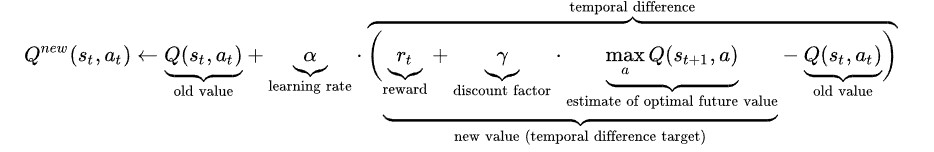
<br />
where $r_{t}$ is the reward received for moving from state $s_{t}$ to state $s_{t+1}$, and $\alpha$ is the learning rate $(0<\alpha \leq 1)$ . <br />
For final states $s_{f}$, $Q(s_{f}, a)$ does not change, but has a reward value $𝑟$ corresponding to the final state $s_{f}$ . In most cases, $Q(s_{f}, a)$ is equal to $0$.

## Exploration vs. exploitation trade-off
In order to satisfy the *trade-off*, the ***$\epsilon$ -greedy*** policy is used, which reads:
+ For some small probability $\epsilon$ choose the action at random.
+ For some high probability $1−\epsilon$ do what the policy says for that state.
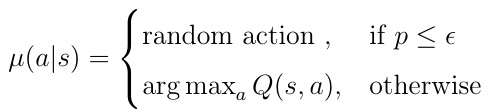

In the project, epsilon ($\epsilon$ ) has a decreasing value (***epsilon decay***).

## Deep Q-Learning Algorithm
Deep Q-Learning uses the *Q-Learning* idea, but in a more efficient way. Instead of using a Q-table, a ***Neural Network*** is used which receives the state as an input and based on it approximates the Q-value for each action based on the forwarded state. <br /> <br />
A neural network is used instead of a Q-table because for large environments (a large number of states and actions) it is not possible to create an appropriate functional table. Therefore, the neural network approximates the Q-value for each state and action.
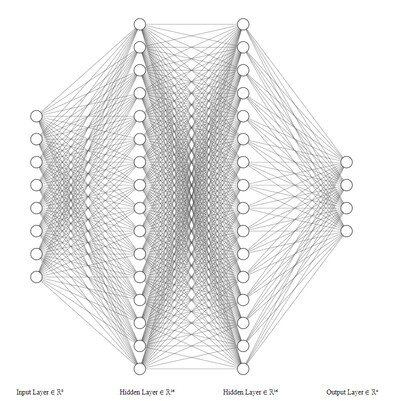
The size of the hidden layers in the image has been reduced for a nicer display of the network. The network implementation is in the [dqn_model.py](dqn_target/dqn_model.py) file.


## Target and Q-Network
In deep Q-Learning, the new (*temporal difference target*) and the *current Q-value* are calculated using different neural networks, which are often called ***Target-network*** and ***Q-network***. The parameters of the target network correspond to the parameters of the Q-network at an earlier time. With this principle, the result is stabilized and alleviates the "***moving target***" problem.
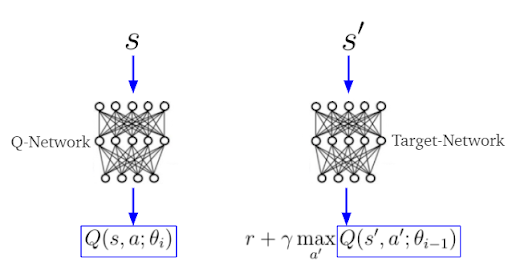
## Experience Replay
Instead of the classic weight change based on the current state and actions that appear during the simulation or concrete experience, the system stores [state, action, reward, next state, done] in the experience buffer. <br /> <br />
In this way, learning is separated from gaining experience and is based on randomly sampling data from the buffer. Although the mentioned processes are independent, we still want to combine them because with the progress of the policy, the agent will be able to move smarter and potentially reach an optimal state. <br /> <br />
Advantages of ***experience replay***:
+ Greater efficiency when using previous experiences, by being able to learn from them repeatedly. This is crucial when agent steps are expensive. Q-learning changes are iterative and do not converge quickly, thus multiple passes through the same data are very useful, especially when there is a small dispersion of immediate outcomes (next state, reward) for the same (state, action) pair.
+ Better convergence when training a neural network (approximator function). Partly because the data obtained in this way are independent.


Disadvantages of ***experience replay***:
+ It is more difficult to use multi-step algorithms, e.g. $Q(\lambda)$.

For real-world examples, a "***Prioritized Replay Buffer***" is also used, which stores a "*TD-error*" for each state and action. The idea is that some experiences may be more important than others for training, but due to random selection, they appear infrequently. The goal is to highlight those experiences where there is a big difference between the predicted value and the target (TD target). <br /> <br />

The implementation of the experience buffer is in the [replay_buffer.py](dqn_target/replay_buffer.py) file.

## Pseudo-code of Deep Q-Learning with Experience Replay
The implementation of algorithm is in the [dqn_agent.py](dqn_target/dqn_agent.py) file.
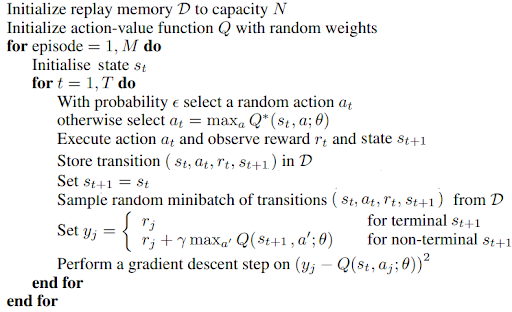

## Testing the algorithm on the Lunar Lander environment
To implement the algorithm, the ***TensorFlow-2*** library with ***Graph Mode*** was used to significantly speed up code execution.

In [1]:
import gym
import warnings
warnings.filterwarnings('ignore')

from dqn_target.dqn_agent import DQNAgent
from dqn_target.utils import epsilon_greedy

The *hyperparameter values* on which the final agent was trained are as follows:

In [2]:
BATCH_SIZE = 64
EPSILON = 1.0
EPSILON_DECAY = 0.996
EPSILON_MIN = 1e-2
LEARNING_RATE = 5e-4
GAMMA = 0.99
FC1_UNITS = 256
FC2_UNITS = 256

# Hyperparameters for agent testing
EPSILON_TEST = 1e-2
ACTION = "TEST"

Agent's training and reward plot display across episodes:

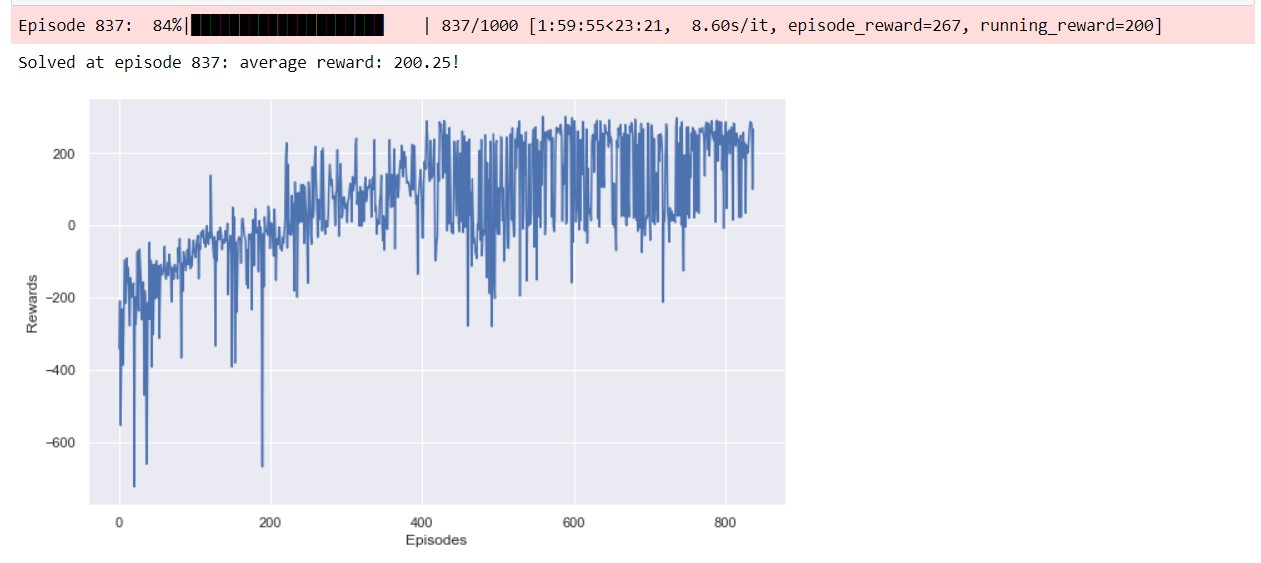

In [3]:
# Initialization of environment
env = gym.make("LunarLander-v2")

dqn_agent = DQNAgent(env, epsilon_greedy, LEARNING_RATE, EPSILON_TEST, EPSILON_DECAY, EPSILON_MIN, GAMMA,
                     BATCH_SIZE, FC1_UNITS, FC2_UNITS)

if ACTION == "TRAIN":
    dqn_agent.train_agent()
else:
    dqn_agent.load_weights('dql_model_weights/')

One episode of trained agent:

In [4]:
dqn_agent.test_agent(display_episode=True)

Episode reward: 282.97!


## Conclusion
The algorithm successfully defeated the environment. It is possible to increase the speed of convergence by *tuning the hyperparameters* or by using more advanced deep q learning algorithms (eg *DDQN*).